In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [53]:
from sklearn.model_selection import train_test_split

In [15]:
#model training libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings



In [167]:
df = pd.read_csv('D:/mlproject/notebook/data/stud1.csv')

In [168]:
df.head(5)

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.6667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.3333
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.6667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3333
4,4,male,group C,some college,standard,none,76,78,75,229,76.3333


In [169]:
X=df.drop(columns=['Unnamed: 0','average_score'],axis=1)

In [170]:
X.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [172]:
y=df['average_score']

#Standardizationa and normalization

In [173]:
categorical_cols=X.select_dtypes(include='object').columns
numerical_cols=X.select_dtypes(include=['float','int64']).columns

In [141]:
categorical_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [142]:
numerical_cols

Index(['math score', 'reading score', 'writing score', 'total_score'], dtype='object')

In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler


In [99]:
# step1=[("imputer",SimpleImputer(strategy='median')),
#         ("scaler", StandardScaler())]
# step2= steps1=[("imputer",SimpleImputer(strategy='most_frequent')),
#         ("scaler", OneHotEncoder())]

In [100]:
# num_pipleine=Pipeline(step1)
# cat_pipleine=Pipeline(step2)

In [144]:
# num_pipleine
# cat_pipleine

In [102]:
#transforms the colums using the pipelines
# preprocessor = ColumnTransformer([
#     ("num_pipleine",num_pipleine,numerical_cols),
#     ("cat_pipleine",cat_pipleine,categorical_cols)
# ])

In [174]:
# numeric_transformer = StandardScaler()
# oh_transformer = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     [
#         ("OneHotEncoder", oh_transformer, categorical_cols),
#          ("StandardScaler", numeric_transformer, numerical_cols),        
#     ]
# )

In [177]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [178]:
X = preprocessor.fit_transform(X)

In [179]:
X.shape

(1000, 21)

In [180]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.19399858,
         0.39149181,  0.34357423],
       [ 1.        ,  0.        ,  0.        , ...,  1.42747598,
         1.31326868,  1.0219275 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.77010859,
         1.64247471,  1.74706375],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.12547206,
        -0.20107904, -0.19443008],
       [ 1.        ,  0.        ,  0.        , ...,  0.60515772,
         0.58901542,  0.46053169],
       [ 1.        ,  0.        ,  0.        , ...,  1.15336989,
         1.18158627,  1.06871048]])

In [182]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 21), (200, 21))

In [183]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.05694554,
         0.45733301,  0.08626782],
       [ 1.        ,  0.        ,  0.        , ...,  0.94779033,
         0.98406266,  0.67105512],
       [ 1.        ,  0.        ,  0.        , ...,  1.35894946,
         1.18158627,  1.18566794],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.49126664,
        -0.99117351, -0.82600036],
       [ 0.        ,  1.        ,  0.        , ..., -1.45063795,
        -0.99117351, -1.22365572],
       [ 1.        ,  0.        ,  0.        , ...,  1.4960025 ,
         1.37910989,  1.44297435]])

In [188]:
#evaluation
def model_evaluation(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae,mse,r2_square

In [190]:
models ={
    "LinearRegression":LinearRegression(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor,
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
     "AdaBoostRegressor":AdaBoostRegressor()


}

In [191]:
list(models.values())

[LinearRegression(),
 KNeighborsRegressor(),
 Ridge(),
 Lasso(),
 RandomForestRegressor(),
 sklearn.tree._classes.DecisionTreeRegressor,
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 AdaBoostRegressor()]

In [192]:
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)#train the model

    #predictions
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)

    #evaluation
    model_train_mae,model_train_rmse,model_train_r2,= model_evaluation(y_pred_train,y_train)
    model_test_mae,model_test_rmse,model_test_r2,= model_evaluation(y_pred_test,y_test)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')




LinearRegression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 3.9268
- Mean Absolute Error: 1.5570
- R2 Score: 0.9774
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.1080
- Mean Absolute Error: 1.9230
- R2 Score: 0.9596


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0048
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0049
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0181
- Mean Absolute Error: 0.8075
- R2 Score: 0.9941
--------------------------

AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'

In [193]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
0,LinearRegression,1.000000
2,Ridge,1.000000
4,RandomForestRegressor,0.995675
3,Lasso,0.993970
1,KNeighborsRegressor,0.959590


In [194]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


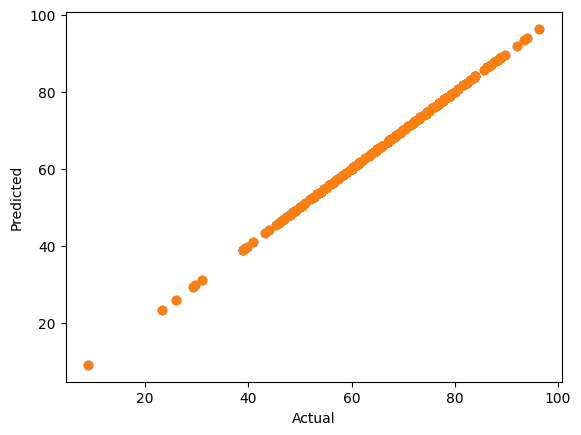

In [198]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [196]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,87.0000,87.000005,-5.006790e-06
737,64.0000,64.000000,4.768372e-07
740,75.0000,75.000003,-2.861023e-06
660,74.6667,74.666655,4.493637e-05
411,81.6667,81.666658,4.231377e-05
...,...,...,...
408,55.0000,55.000008,-7.867813e-06
332,57.0000,56.999997,2.622604e-06
208,77.0000,76.999999,9.536743e-07
613,72.0000,72.000000,2.384186e-07
